In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# fxn for plotting
def get_ax(figsize=(6,4), fsize=15):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax, fsize

In [3]:
def linear(x, m, b):
    return m*x+b

In [4]:
def get_dist(x, y):
    dx = x-2351
    dy = y - 1616
    return np.sqrt(dx**2 + dy**2)

In [5]:
p1 = [(2365, 1419), (2368, 1399), (2369, 1381), (2370, 1365), (2372, 1349), (2371, 1333), (2371, 1320), (2372, 1307), (2371, 1293)]
len(p1)

9

In [6]:
dist1 = [get_dist(x, y) for x, y in p1]
sqr1 = [x**2 for x in dist1]

In [7]:
dist1

[197.4968354176846,
 217.66488003350472,
 235.68835355188853,
 251.7180962902747,
 267.8245694479877,
 283.70583356709466,
 296.67490625261854,
 309.7127701597078,
 323.6186026791414]

In [8]:
p2 = [(2371, 1282), (2374, 1269), (2379, 1259), (2379, 1247), (2378, 1236), (2375, 1225), (2375, 1215), (2375, 1205), (2375, 1193)]
len(p1)

9

In [9]:
dist2 = [get_dist(x, y) for x, y in p2]
sqr2 = [x**2 for x in dist2]

In [10]:
dist2

[334.5982665824795,
 347.76141246550054,
 358.09635574800257,
 370.06080581439585,
 380.9580029347067,
 391.735880409237,
 401.7175624739352,
 411.7001335924,
 423.68030400291207]

In [11]:
p3 = [(2376, 1185), (2377, 1176), (2378, 1167), (2378, 1158), (2376, 1148), (2377, 1140), (2378, 1131), (2377, 1123), (2378, 1114)]
len(p3)

9

In [12]:
dist3 = [get_dist(x, y) for x, y in p3]
sqr3 = [x**2 for x in dist3]

In [13]:
dist3

[431.7244491570984,
 440.7675124144247,
 449.8110714511149,
 458.7951612648067,
 468.667259364253,
 476.7095551800908,
 485.7509650016148,
 493.6851223198852,
 502.7255712612996]

In [14]:
p4 = [(2379, 1107), (2377, 1099), (2377, 1091), (2376, 1083), (2376, 1075), (2377, 1068), (2376, 1061), (2376, 1053), (2376, 1046)]
len(p4)

9

In [15]:
dist4 = [get_dist(x, y) for x, y in p4]
sqr4 = [x**2 for x in dist4]

In [16]:
dist4

[509.7695557798641,
 517.6533589188812,
 525.6434152541055,
 533.5859818248601,
 541.5773259655541,
 548.6164416056084,
 555.562777730834,
 563.5547888182657,
 570.5479822065801]

In [17]:
p5 = [(2379, 1040), (2379, 1032), (2380, 1025), (2380, 1018), (2380, 1011), (2380, 1004), (2379, 997), (2380, 991), (2380, 985)]
len(p5)

9

In [18]:
dist5 = [get_dist(x, y) for x, y in p5]
sqr5 = [x**2 for x in dist5]

In [19]:
dist5

[576.6801539848584,
 584.6708475715203,
 591.711078145407,
 598.7027643163175,
 605.694642538631,
 612.6867062373722,
 619.632955869844,
 625.6724382614276,
 631.6660510111336]

In [20]:
sqr_list = [sqr1, sqr2, sqr3, sqr4, sqr5]

In [21]:
dm2 = [x[0] for x in sqr_list]
dm15 = [x[1] for x in sqr_list]
dm1 = [x[2] for x in sqr_list]
dm05 = [x[3] for x in sqr_list]
d0 = [x[4] for x in sqr_list]
d05 = [x[5] for x in sqr_list]
d1 = [x[6] for x in sqr_list]
d15 = [x[7] for x in sqr_list]
d2 = [x[8] for x in sqr_list]

In [22]:
d_list = [dm2, dm15, dm1, dm05, d0, d05, d1, d15, d2]

In [23]:
ring_num = np.arange(5) +1
ring_num

array([1, 2, 3, 4, 5])

In [24]:
param_m2, param_cov = curve_fit(linear, dm2, ring_num, maxfev=10000)
m_m2, b_m2 = param_m2
fit_m2 = [linear(x, m_m2, b_m2) for x in dm2]

In [25]:
delta_list = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

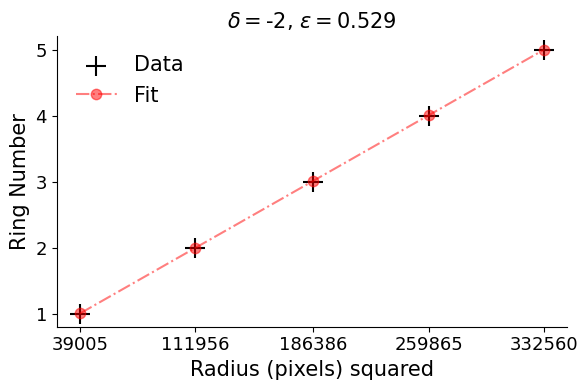

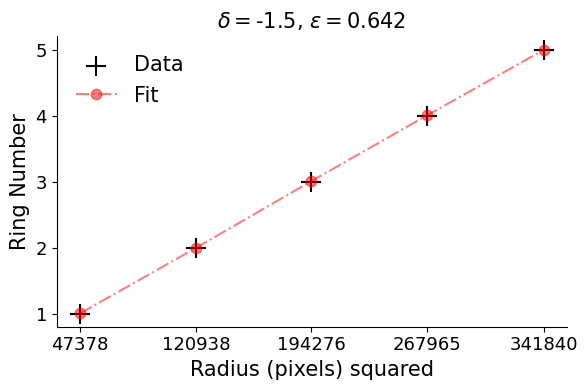

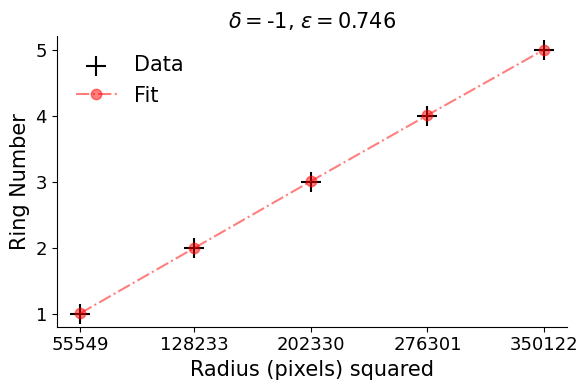

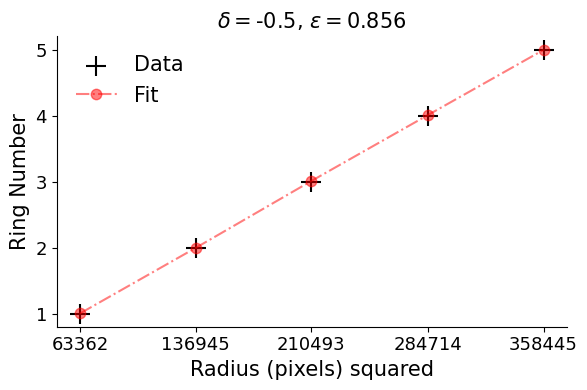

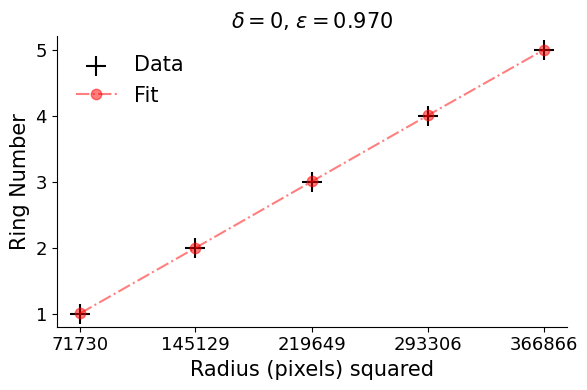

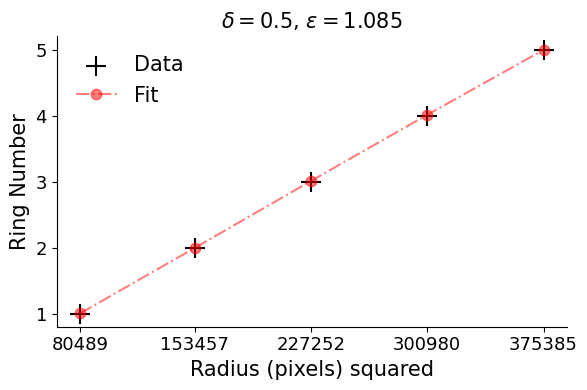

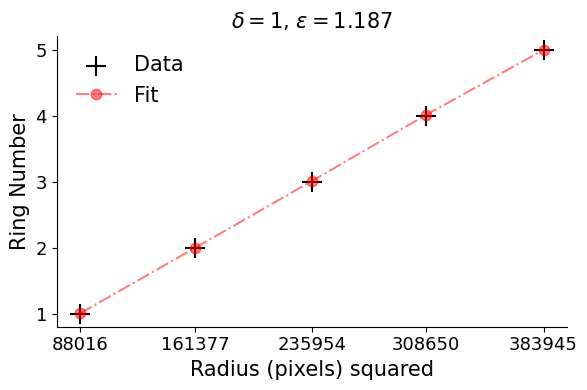

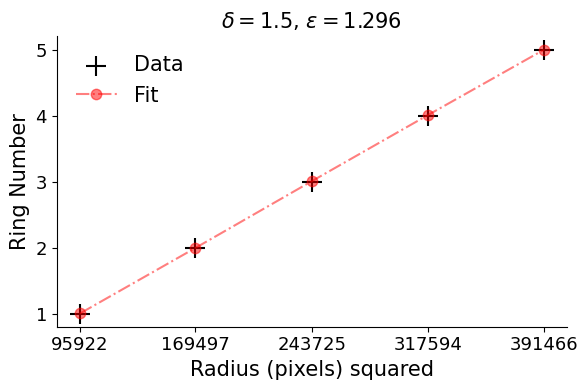

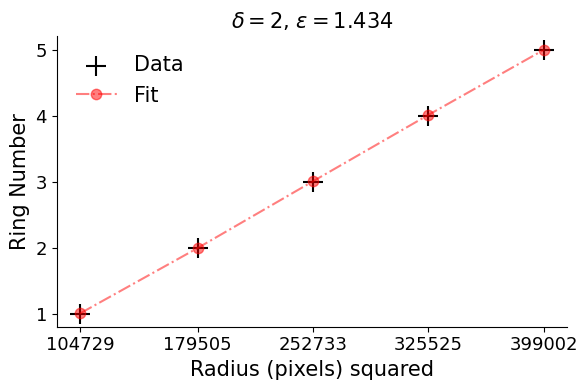

In [31]:
ep_list = []
for d_idx in range(len(d_list)):
    d = d_list[d_idx]

    # fitting
    param, param_cov = curve_fit(linear, d, ring_num, maxfev=10000)
    
    m, b = param
    epsilon = -b + 1
    ep_list.append(epsilon)
    
    fit = [linear(x, m, b) for x in dm2]

    # plotting
    ax, fsize = get_ax()

    plt.scatter(d, ring_num, c="0", marker="+", s=200, label="Data", alpha=1)
    plt.plot(d, fit_m2, c="r", marker=".", markersize=fsize, label="Fit", alpha=0.5, linestyle="-.")

    plt.xticks(d, size=fsize-2)
    plt.yticks(ring_num, size=fsize-2)

    plt.xlabel("Radius (pixels) squared", size=fsize)
    plt.ylabel("Ring Number", size=fsize)
    plt.legend(fontsize=fsize, frameon=False)
    
    plt.title("$\delta=$"+str(delta_list[d_idx])+", $\epsilon=$"+str(epsilon)[:5], size=fsize)

    plt.tight_layout()
    plt.savefig(f"Plots/delta_plot_{d_idx}.pdf")

[0.22297681 0.97218454]


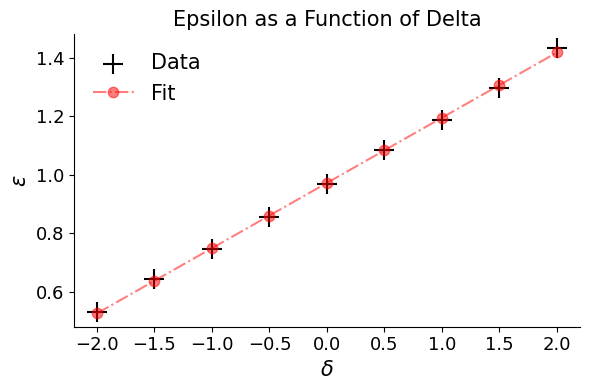

In [29]:
# plotting
ax, fsize = get_ax()

param, param_cov = curve_fit(linear, delta_list, ep_list, maxfev=10000)
m, b = param
print(param)
fit = [linear(x, m, b) for x in delta_list]

plt.scatter(delta_list, ep_list, c="0", marker="+", label="Data", s=200)
plt.plot(delta_list, fit, c="r", marker=".", markersize=fsize, label="Fit", alpha=0.5, linestyle="-.")

plt.xticks(size=fsize-2)
plt.yticks(size=fsize-2)
plt.xlabel("$\delta$", size=fsize)
plt.ylabel("$\epsilon$", size=fsize)

plt.legend(fontsize=fsize, frameon=False)

plt.title("Epsilon as a Function of Delta", size=fsize)

plt.tight_layout()
plt.savefig(f"Plots/ep_del.pdf")